# Lab 7- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [3]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


## Exercise 7.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [4]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

2023-05-01 11:21:01.473745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 11:21:01.827295: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 11:21:01.834582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 11:21:03.413511: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 12)                228       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


2023-05-01 11:21:05.667415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-01 11:21:05.668136: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
def history_epoc_plot():
    history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), 
                      epochs=10, batch_size=2048)
    print (history.history)
    plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
    plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
    plt.legend()

Epoch 1/10
245/245 [==============================] - 2s 6ms/step - loss: 0.5719 - accuracy: 0.6885 - val_loss: 0.4604 - val_accuracy: 0.7864
Epoch 2/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.7921 - val_loss: 0.4499 - val_accuracy: 0.7915
Epoch 3/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.7950 - val_loss: 0.4468 - val_accuracy: 0.7931
Epoch 4/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4421 - accuracy: 0.7964 - val_loss: 0.4448 - val_accuracy: 0.7933
Epoch 5/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.7975 - val_loss: 0.4414 - val_accuracy: 0.7946
Epoch 6/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4384 - accuracy: 0.7980 - val_loss: 0.4403 - val_accuracy: 0.7950
Epoch 7/10
245/245 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7984 - val_loss: 0.4389 - val_accuracy: 0.7953
Epoch 

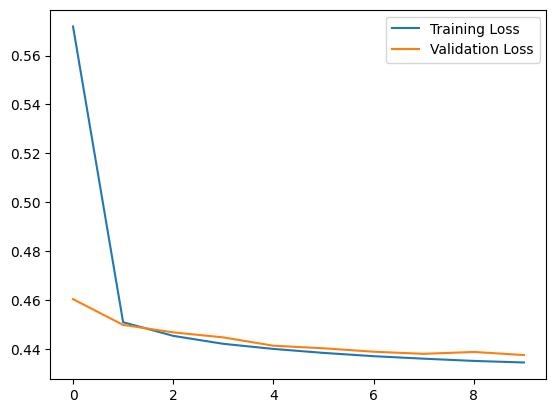

In [7]:
history_epoc_plot()

## Exercise 7.2

Following the original paper (see lab 5), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [8]:
scores = model.evaluate(X_Test, y_Test)
print(scores)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.4375 - accuracy: 0.7967
[0.43753769993782043, 0.7966799736022949]


In [9]:
model.predict(X_Test)

1563/1563 [==============================] - 3s 2ms/step


array([[0.8025181 ],
       [0.09218868],
       [0.12133335],
       ...,
       [0.5390001 ],
       [0.3327874 ],
       [0.21045765]], dtype=float32)

1563/1563 [==============================] - 3s 2ms/step


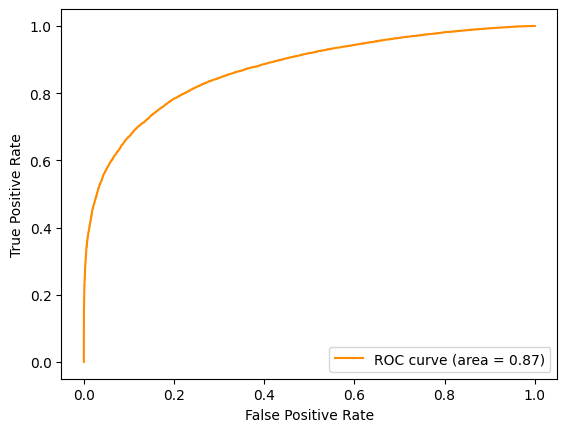

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise 7.3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

## Exercise 7.4

Repeat exercise 4 from Lab 6, adding your best performing DNN as one of the models.  


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#keras models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [13]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [14]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
model.fit(X_Train, y_Train, epochs=20)

Epoch 1/20


ValueError: in user code:

    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(32, 18)


In [18]:
pred_train= model.predict(X_Train)
scores = model.evaluate(X_Train, y_Train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

pred_test= model.predict(X_Test)
scores2 = model.evaluate(X_Test, y_Test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

ValueError: in user code:

    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/efazh/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(32, 18)
